In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc


In [22]:
online = pd.read_csv("online_shoppers_intention.csv")
online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [23]:
online = pd.read_csv("online_shoppers_intention.csv")
online.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [24]:
counts = online["Revenue"].value_counts()
print(counts)


Revenue
False    10422
True      1908
Name: count, dtype: int64


In [25]:
x = online.drop("Revenue",axis = 1)
x.shape
print(x.columns)


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')


In [34]:
# Apply one-hot encoding to specific columns
x_encoded = pd.get_dummies(x, columns=['Month','VisitorType','Weekend'])

# Print column names
print(x_encoded.columns)
x_encoded

y = online["Revenue"]



Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')
0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12330, dtype: bool


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y,test_size= 0.25)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [28]:
def applyKNN(x_train,y_train,x_test,metric_p):
  knn = KNeighborsClassifier(n_neighbors = 5,metric = metric_p)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  return y_pred


In [29]:
def apply_metrics(y_test,y_pred,metric_name):
  print(metric_name.upper())
  print("Predicted y_pred:- \n")
  print(y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)
  print("Classification report:- \n",classification_report(y_test,y_pred))
  print("Confusion matrix :- \n",confusion_matrix(y_pred,y_test))


In [30]:
def plotROC(y_test,y_pred):
  fpr, tpr, threshold = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  print(roc_auc)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve of kNN')
  plt.show()


MANHATTAN
Predicted y_pred:- 

[False False False ... False False False]
Accuracy: 0.8773921505027571
Classification report:- 
               precision    recall  f1-score   support

       False       0.89      0.98      0.93      2620
        True       0.70      0.32      0.44       463

    accuracy                           0.88      3083
   macro avg       0.80      0.65      0.69      3083
weighted avg       0.86      0.88      0.86      3083

Confusion matrix :- 
 [[2557  315]
 [  63  148]]
0.6478043130595355


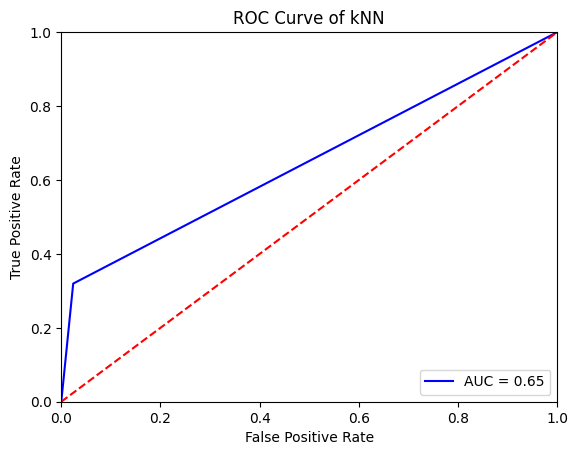

In [31]:
vals = applyKNN(x_train,y_train,x_test,'manhattan')
apply_metrics(y_test,vals,'manhattan')
plotROC(y_test,vals)


EUCLIDEAN
Predicted y_pred:- 

[False False False ... False False False]
Accuracy: 0.8786895880635744
Classification report:- 
               precision    recall  f1-score   support

       False       0.90      0.97      0.93      2620
        True       0.68      0.36      0.47       463

    accuracy                           0.88      3083
   macro avg       0.79      0.67      0.70      3083
weighted avg       0.86      0.88      0.86      3083

Confusion matrix :- 
 [[2542  296]
 [  78  167]]
0.6654600761710056


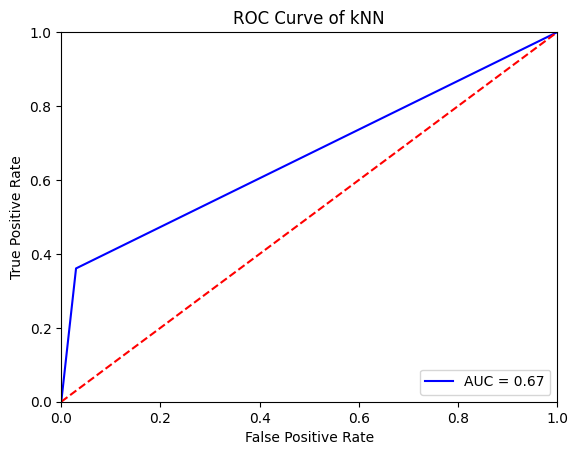

In [32]:
vals = applyKNN(x_train,y_train,x_test,'euclidean')
apply_metrics(y_test,vals,'euclidean')
plotROC(y_test,vals)


MINKOWSKI
Predicted y_pred:- 

[False False False ... False False False]
Accuracy: 0.8786895880635744
Classification report:- 
               precision    recall  f1-score   support

       False       0.90      0.97      0.93      2620
        True       0.68      0.36      0.47       463

    accuracy                           0.88      3083
   macro avg       0.79      0.67      0.70      3083
weighted avg       0.86      0.88      0.86      3083

Confusion matrix :- 
 [[2542  296]
 [  78  167]]
0.6654600761710056


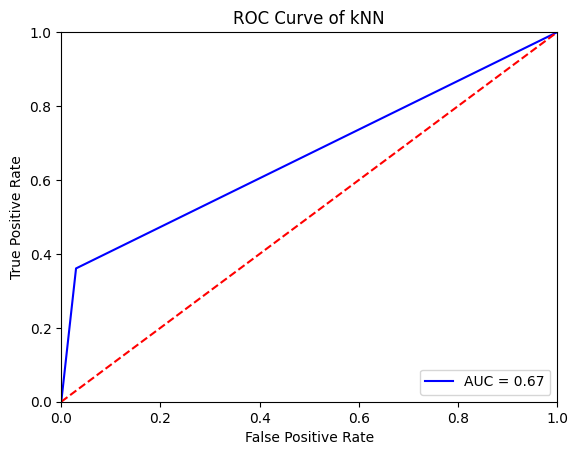

In [33]:
vals=applyKNN(x_train,y_train,x_test,'minkowski')
apply_metrics(y_test,vals,'minkowski')
plotROC(y_test,vals)
